In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import calendar

In [2]:
csv_path1= "clean_crime_data.csv"
crime_df = pd.read_csv(csv_path1)
del crime_df['Unnamed: 0']
crime_df.head()

,Age,Gender,Race,Offenses Severity,Arrest Time of Day,Arrest Hour,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature Range,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,24.0,F,B,Misdemeanor,Evening (9-12am),21,Friday,12,February,2016,20s,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,31.0,M,W,Misdemeanor,Early Afternoon (1-4pm),15,Wednesday,17,February,2016,30s,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1
2,36.0,M,W,Misdemeanor,Early Morning (12-3am),2,Friday,8,April,2016,30s,39.39,Overcast,"Boyd ST & Diamond ST Pittsburgh, PA 15219",40.438656,-79.993293,Bluff,2
3,60.0,M,W,Misdemeanor,Late Morning (9am-12pm),9,Sunday,10,April,2016,30s,32.63,Overcast,"Forbes AV & Armstrong TUN Pittsburgh, PA 15219",40.437971,-79.992052,Bluff,2
4,54.0,M,B,Misdemeanor,Early Morning (12-3am),1,Tuesday,12,April,2016,40s,47.32,Clear,"1600 Block Forbes AV Pittsburgh, PA 15219",40.437377,-79.983870,Bluff,2


In [3]:
crime_df.describe()

,Age,Arrest Hour,Arrest Date,Arrest Year,Temperature,Incident Latitude,Incident Longitude
count,17766.000000,17766.000000,17766.000000,17766.000000,17766.000000,17766.000000,17766.000000
mean,32.964426,13.366093,15.594788,2017.246763,59.972805,38.073939,-75.289921
std,12.710878,6.375690,8.813583,0.701259,18.643190,9.499130,18.784226
min,10.000000,1.000000,1.000000,2016.000000,7.270000,0.000000,-80.487212
25%,24.000000,9.000000,8.000000,2017.000000,44.330000,40.423083,-80.005447
50%,30.000000,14.000000,16.000000,2017.000000,64.135000,40.447123,-79.985053
75%,41.000000,19.000000,23.000000,2018.000000,76.190000,40.458881,-79.930718
max,98.000000,23.000000,31.000000,2018.000000,90.990000,41.233036,0.000000


<function matplotlib.pyplot.show(*args, **kw)>

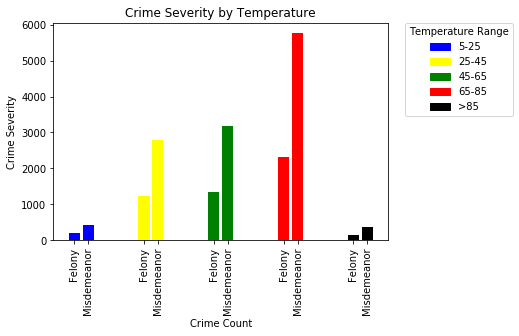

In [4]:
#Temperature group, crime severity bar chart
stevie_plot_df = crime_df[['Offenses Severity', 'Temperature', 'Weather Condition']].copy()


bins = [5,25,45,65,85,1000]
bin_names = ['5-25','25-45','45-65','65-85','>85']

stevie_plot_df['Temperature Group'] = pd.cut(stevie_plot_df["Temperature"],
                                             bins,
                                             labels=bin_names)

stevie_gp1 = stevie_plot_df.groupby(['Temperature Group','Offenses Severity'])
stevie_1_df = stevie_gp1.count()


x_pos = []
for x in range(len(bins) - 1):
    x_pos.append(x*5)
    x_pos.append(x*5+1)
    
    
tick_labels = ['Felony', "Misdemeanor"]
tick_labels = tick_labels *5 
tick_locations = [x for x in x_pos]

color = ['blue', 'yellow', 'green', 'red' , 'black']
colors = []
for x in color:
    colors.append(x)
    colors.append(x)
    

plt.bar(x_pos,
        stevie_1_df['Temperature'],
        color = colors
       )

plt.xticks(tick_locations,
           tick_labels,
           rotation = 'vertical'
          )

plt.title('Crime Severity by Temperature')

plt.xlabel('Crime Count')
plt.ylabel('Crime Severity')

patches = []
for x, y in zip(color, bin_names):
    patches.append(mpatches.Patch(color= x, label= y))
    
plt.legend(title = 'Temperature Range',
           handles=patches,
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)
plt.savefig("Plots/crime_severity_temperature.png")

plt.show

### Luiz Peter

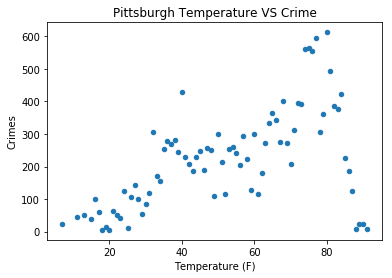

In [5]:
crime_df["Rounded Temp"]=round(crime_df["Temperature"])
temp_group = crime_df.groupby('Rounded Temp').count()["Age"].reset_index().rename(columns={"Age":"Crimes",
                                                                                               "Rounded Temp":"Temperature (F)"})
temp_group.plot(kind="scatter",x= "Temperature (F)" , y= "Crimes", title= "Pittsburgh Temperature VS Crime")
plt.savefig('Plots/temperature_crime.png')

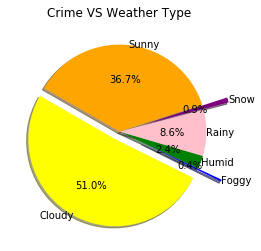

In [6]:
#Breaking down 15 categories into 6 total for plotting Crime VS 
crime_df["Weather Type"]=crime_df["Weather Condition"].replace({"Mostly Cloudy":"Cloudy","Overcast":"Cloudy","Partly Cloudy":"Cloudy",
                                           "Light Rain":"Rainy","Drizzle":"Rainy","Rain":"Rainy","Clear":"Sunny",
                                           "Light Snow":"Snow","Flurries":"Snow","Humid and Mostly Cloudy":"Humid",
                                            "Humid and Overcast":"Humid","Humid and Partly Cloudy":"Humid"})

temp_type = crime_df.groupby('Weather Type').count()["Age"].reset_index().rename(columns={"Age":"Crimes"})


# Weather Condition VS Percent of Crime: 
 
labels = []
for x in temp_type['Weather Type']:
    labels.append(x)

crimes = []
for x in temp_type['Crimes']:
    crimes.append(x)
    
colors = ["yellow" ,"blue" ,"green", "pink", "purple", "orange"]

explode = [.1,.3,0,0,.3,0]
     
plt.pie(crimes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, 
        pctdistance=.6, labeldistance=1, startangle=150)
plt.title("Crime VS Weather Type")

plt.savefig("Plots/wtype_crime.png")

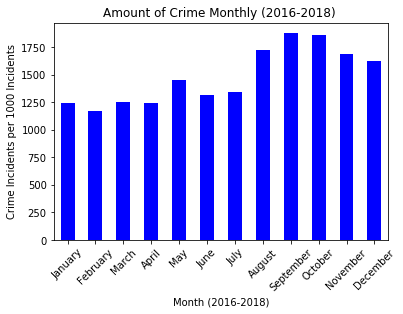

In [7]:
#PETER # Crime Frequency vs Time of Year (seasonality)
# Group data by each month
month_group = crime_df.groupby('Arrest Month')
# Find total amount of crime incidents in each month
monthly_crime = month_group['Arrest Date'].count()
# Organize Months to appear in correct yearly order
organized_monthly_crime = monthly_crime.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


# Graph data & edit chart
organized_monthly_crime_chart = organized_monthly_crime.plot(kind="bar", title="Amount of Crime Monthly (2016-2018) ", 
                                        rot='45', color='blue')
organized_monthly_crime_chart.set_xlabel("Month (2016-2018)")
organized_monthly_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")
# Show graph

plt.savefig("Plots/crime_by_month.png")

plt.show()

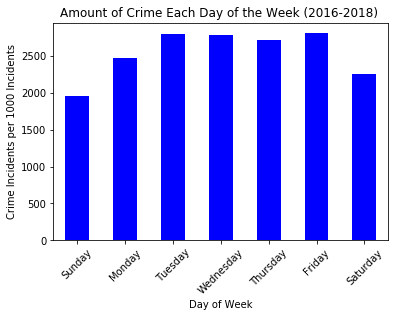

In [8]:
# Group data by each month
day_group = crime_df.groupby('Arrest Day of Week')
# Find total amount of crime incidents in each month
daily_crime = day_group['Arrest Date'].count()
# Organize Days of Week to be in correct order
organized_daily_crime = daily_crime.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                                                 'Thursday', 'Friday', 'Saturday'])


# Graph data & edit chart
organized_daily_crime_chart = organized_daily_crime.plot(kind="bar", title="Amount of Crime Each Day of the Week (2016-2018) ", 
                                        rot='45', color='blue')
organized_daily_crime_chart.set_xlabel("Day of Week")
organized_daily_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")

plt.savefig("Plots/crime_by_day_of_week.png")

plt.show()

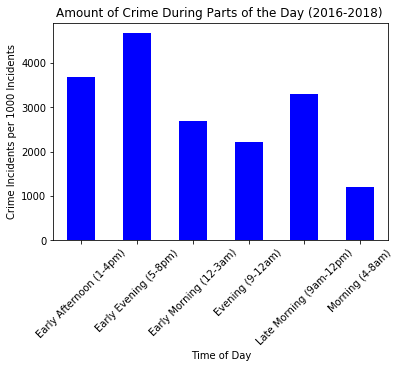

In [9]:
#PETER # Crime Frequency vs Time of Day 

# Group data by each month
day_time_group = crime_df.groupby('Arrest Time of Day')
# Find total amount of crime incidents in each month
day_time_crime = day_time_group['Arrest Date'].count()

# Graph data & edit chart
day_time_crime_chart = day_time_crime.plot(kind="bar", title="Amount of Crime During Parts of the Day (2016-2018) ", 
                                        rot='45', color='blue')
day_time_crime_chart.set_xlabel("Time of Day")
day_time_crime_chart.set_ylabel("Crime Incidents per 1000 Incidents")

plt.savefig("Plots/crime_by_time_of_day.png")

plt.show()



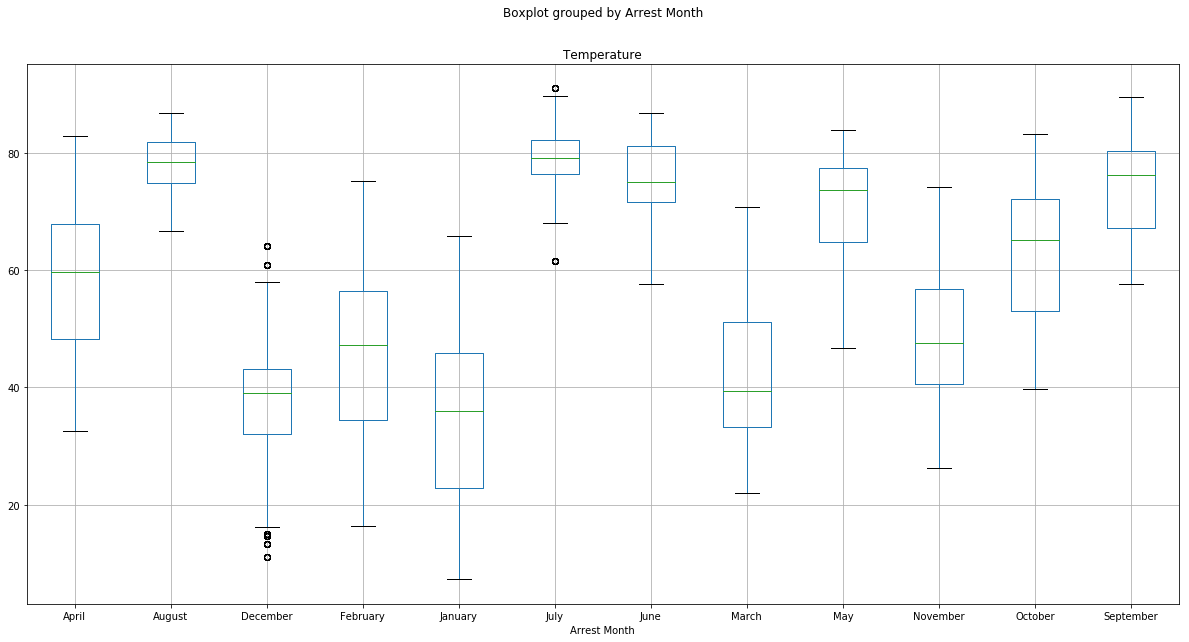

In [10]:
crime_df.boxplot("Temperature", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Temperature_by_Month_boxplot.png")

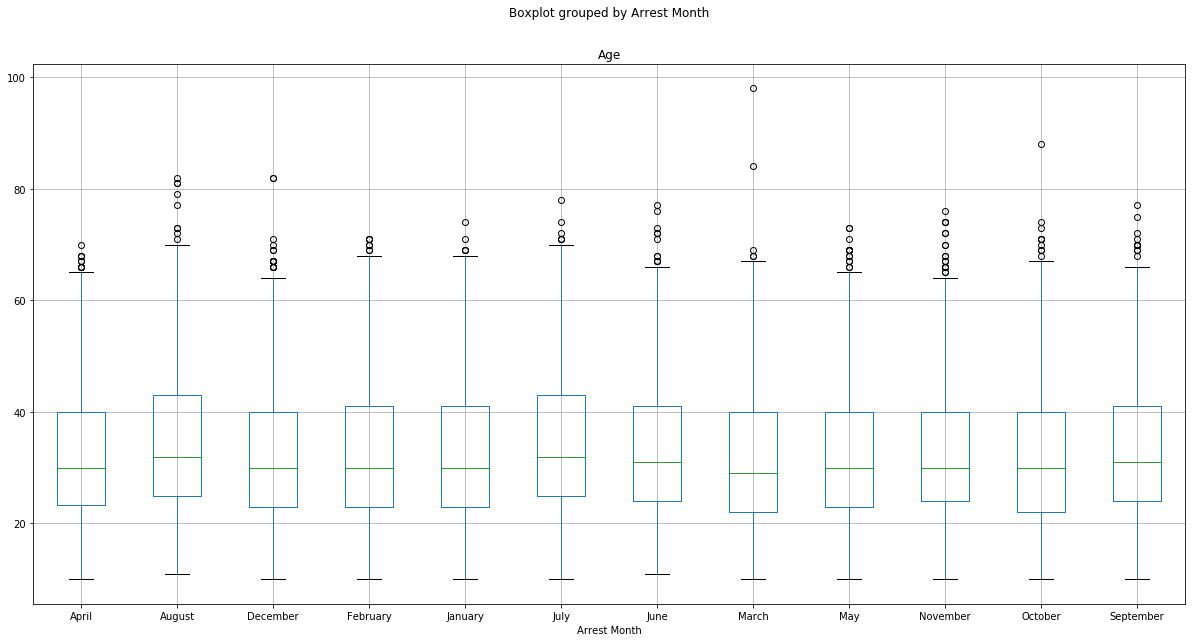

In [11]:
crime_df.boxplot("Age", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Age_by_Month_boxplot.png")

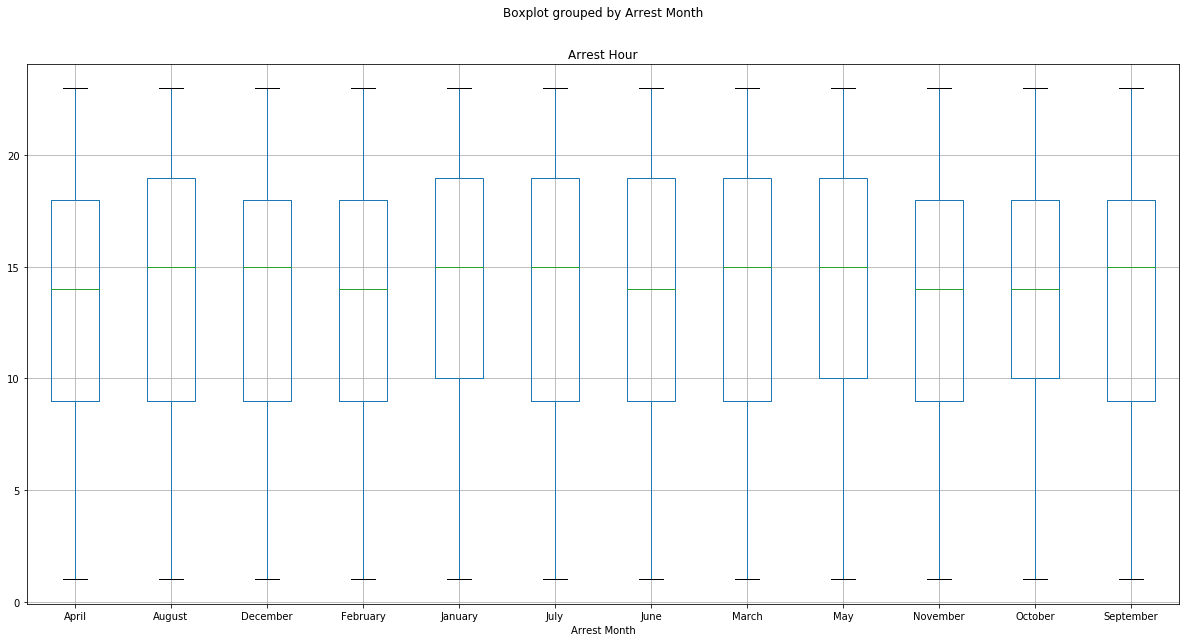

In [12]:
crime_df.boxplot("Arrest Hour", by="Arrest Month", figsize=(20, 10))
plt.savefig("Plots/Arrest_Hour_by_Month_boxplot.png")

### Ema

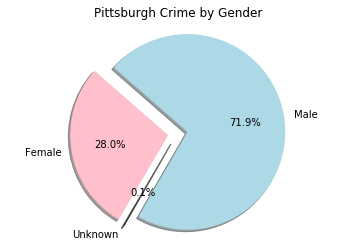

In [13]:
gender_count = crime_df["Gender"].value_counts()
total_gender_count = crime_df["Gender"].count()
gender_percentage = (gender_count/total_gender_count) *100

Gender = ["Male", "Female", "Unknown"]
Percent = [gender_percentage]
colors = ["LightBlue", "Pink", "Black"]
explode = (0.1, 0.1, 0.1)


plt.pie(gender_percentage, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime by Gender")

plt.savefig("Plots/crime_by_gender.png")

plt.show()

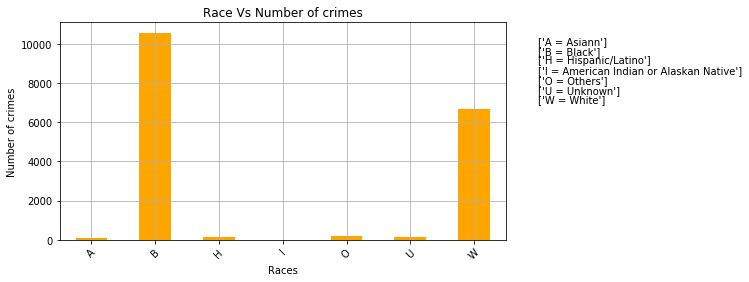

In [14]:
race_group = crime_df.groupby("Race")

race_type_crime = race_group["Offenses Severity"].count()

race_plot = race_type_crime.plot(kind="bar",
                                 title="Race Vs Number of crimes",
                                 rot='45', color='orange',
                                 figsize=(8,4),grid=True)

plt.text(7,10000, ['A = Asiann']) 
plt.text(7,9500, ['B = Black'])
plt.text(7,9000, ['H = Hispanic/Latino']) 
plt.text(7,8500, ['I = American Indian or Alaskan Native']) 
plt.text(7,8000, ['O = Others'])
plt.text(7,7500, ['U = Unknown'])    
plt.text(7,7000, ['W = White'])

race_plot.set_xlabel("Races")
race_plot.set_ylabel("Number of crimes")
plt.savefig("Plots/barcrime_by_race.png")
plt.show()

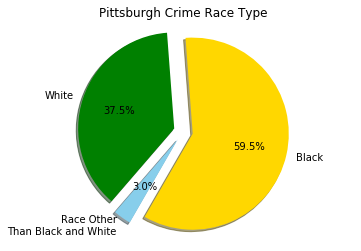

In [15]:
races_df = crime_df.loc[:,["Race"]]

black_race = races_df[races_df["Race"]== "B"].count()
white_race = races_df[races_df["Race"]== "W"].count()


asian_race = races_df[races_df["Race"]== "A"].count()
hispanic_latino_race = races_df[races_df["Race"]== "H"].count()
american_indian_alaskan_native = races_df[races_df["Race"]== "I"].count()
others_race = races_df[races_df["Race"]== "O"].count()
unknown_race = races_df[races_df["Race"]== "U"].count()


race_otherthan_black_and_white_count = (asian_race + hispanic_latino_race + 
                                            american_indian_alaskan_native + 
                                        others_race + unknown_race)


all_races_count = pd.concat([black_race, white_race, race_otherthan_black_and_white_count],axis=0).fillna(0)

all_races_grand_total = races_df["Race"].count()
race_percentage = (all_races_count/all_races_grand_total) *100

Races = ["Black", "White", "Race Other\nThan Black and White"]
Percent = ["race percentage"]
colors = ["gold", "green","skyblue"]
explode = (0.1,0.1,0.1)


plt.pie(race_percentage, explode=explode, labels= Races, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime Race Type")


plt.savefig("Plots/piecrime_by_Race.png")
plt.show()

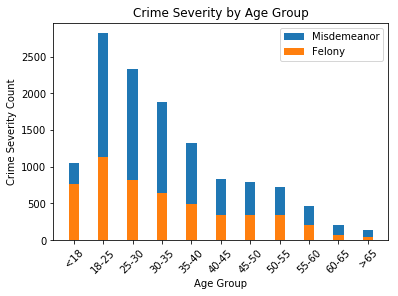

In [16]:
bins = [0,18,25,30,35,40,45,50,55,60,65,100]
group_labels = ["<18","18-25","25-30","30-35","35-40","40-45","45-50","50-55",
                "55-60","60-65",">65"]

pd.cut(crime_df["Age"], bins, labels = group_labels)
crime_df["Age_group"] = pd.cut(crime_df["Age"], bins, labels = group_labels) 

df4=crime_df.groupby(["Offenses Severity", "Age_group"])['Offenses Severity'].count().unstack("Age_group").fillna(0)
felonies = df4[:1].values[0]

misdemeanor = df4[1:2].values[0]
number_of_x = np.arange(11)

p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

Age_plot = plt.xticks(number_of_x, df4.columns, rotation=45)

plt.xlabel("Age Group")
plt.ylabel("Crime Severity Count")
plt.title("Crime Severity by Age Group")

plt.legend(labels = ['Misdemeanor','Felony'])
plt.savefig("Plots/crime_severity_by_Age_group.png")

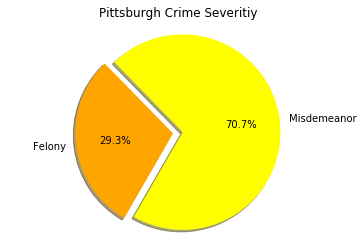

In [17]:
crime_type_count = crime_df["Offenses Severity"].value_counts()
total_crime_count = crime_df["Offenses Severity"].count()
crime_percentage = (crime_type_count/total_crime_count) *100

Offenses = ["Misdemeanor", "Felony"]
Percent = [crime_percentage]
colors = ["Yellow", "Orange"]
explode = (0.1,0)


plt.pie(crime_percentage, explode=explode, labels=Offenses, colors=colors, autopct="%1.1f%%", shadow=True, startangle= 240)
plt.axis("equal")
plt.title("Pittsburgh Crime Severitiy")
plt.savefig("Plots/crime_by_severity.png")
plt.show()

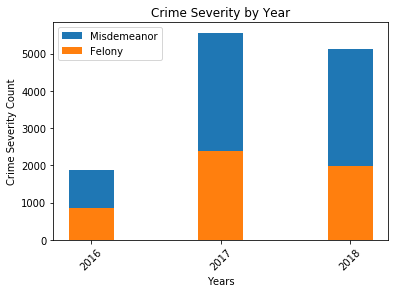

In [18]:
crime_df1 = crime_df.loc[:,["Offenses Severity", "Arrest Year", "Arrest Month"]]

df2=crime_df1.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)

order_list = ["January", "February", "March", "April", 
              "May", "June", "July", "August", "September", 
              "October", "November", "December"] 

df2 = crime_df.groupby(['Offenses Severity', 'Arrest Month'])['Offenses Severity'].count().unstack('Arrest Month').fillna(0)
df2 = df2[order_list]

df3 = crime_df.groupby(['Offenses Severity', 'Arrest Year'])['Offenses Severity'].count().unstack('Arrest Year').fillna(0)

felonies = df3[:1].values[0]

misdemeanor = df3[1:2].values[0]

number_of_x = np.arange(3)
p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)

year_plot = plt.xticks(number_of_x, df3.columns, rotation=45)

plt.xlabel("Years")
plt.ylabel("Crime Severity Count")
plt.title("Crime Severity by Year")


plt.legend(labels = ['Misdemeanor','Felony'])
plt.savefig("Plots/crime_severity_by_year.png")


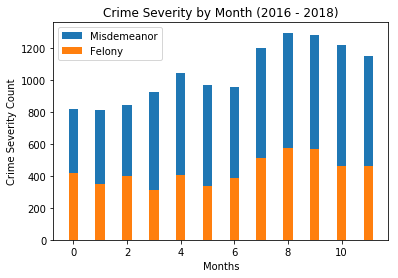

In [19]:
felonies = df2[:1].values[0]
misdemeanor = df2[1:2].values[0]

number_of_x = np.arange(12)

p2 = plt.bar(number_of_x, misdemeanor, .35)
p1 = plt.bar(number_of_x, felonies, .35)


plt.xlabel("Months")
plt.ylabel("Crime Severity Count")
plt.title("Crime Severity by Month (2016 - 2018)")

plt.legend(labels = ['Misdemeanor','Felony'])
plt.savefig("Plots/crime_severity_by_month.png")

In [20]:
import scipy.stats as stats


In [50]:
gender_crime = crime_df.groupby(["Offenses Severity", "Gender"])["Offenses Severity"].count().unstack("Gender").fillna(0)
gender_crime

Gender,F,M,U
Offenses Severity,,,
Felony,1380,3823,8
Misdemeanor,3592,8950,13


In [51]:
gender_crime = crime_df.groupby(["Offenses Severity", "Gender"])["Offenses Severity"].count().unstack("Gender").fillna(0)
del gender_crime ['U']
test_summarized = gender_crime.T
test_summarized

Offenses Severity,Felony,Misdemeanor
Gender,,
F,1380,3592
M,3823,8950


In [52]:
stats.chi2_contingency(test_summarized.values)

(8.064120496510272,
 0.004515038620721251,
 1,
 array([[1457.83691181, 3514.16308819],
        [3745.16308819, 9027.83691181]]))

# Liam

In [25]:
#Drop irrelevant columns
heatmap_DF = crime_df[['Offenses Severity', 'Arrest Day of Week', 'Arrest Date', 'Arrest Month', 'Arrest Year', 'Temperature', 'Weather Condition', 'Incident Location', 'Incident Latitude', 'Incident Longitude', 'Incident Neighborhood', 'Incident Zone']]
heatmap_DF.head()

,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,Misdemeanor,Friday,12,February,2016,20.53,Mostly Cloudy,"1100 Block McKinney LANE Pittsburgh, PA 15205",40.423529,-80.035034,Ridgemont,6
1,Misdemeanor,Wednesday,17,February,2016,32.76,Overcast,"800 Block Concord ST Pittsburgh, PA 15212",40.457564,-79.997924,East Allegheny,1
2,Misdemeanor,Friday,8,April,2016,39.39,Overcast,"Boyd ST & Diamond ST Pittsburgh, PA 15219",40.438656,-79.993293,Bluff,2
3,Misdemeanor,Sunday,10,April,2016,32.63,Overcast,"Forbes AV & Armstrong TUN Pittsburgh, PA 15219",40.437971,-79.992052,Bluff,2
4,Misdemeanor,Tuesday,12,April,2016,47.32,Clear,"1600 Block Forbes AV Pittsburgh, PA 15219",40.437377,-79.983870,Bluff,2


In [26]:
import geopandas as gpd
import folium

#Pull Pittsburgh City Borders
congr_districts = gpd.read_file("API call and cleaning/Resources/cb_2015_us_cd114_20m")
congr_districts.crs = {'datum': 'NAD83', 'ellps': 'GRS80', 'proj':'longlat', 'no_defs':True}

district14 = congr_districts[ congr_districts.GEOID == '4214' ]  # 42 = PA, 14 = District

#Create folium map config
distric_map = folium.Map(location=[40, -80], zoom_start=9, tiles='cartodbpositron' )
print('default map crs: ',distric_map.crs)

ModuleNotFoundError: No module named 'geopandas'

In [39]:
#Create Folium Map
folium.GeoJson(district14).add_to(distric_map)
distric_map

NameError: name 'folium' is not defined

In [41]:
heatmap_DF["Rounded Lat"] = round(heatmap_DF["Incident Latitude"], 4)
heatmap_DF["Rounded Long"] = round(heatmap_DF["Incident Longitude"], 4)
heatmap_DF2 = heatmap_DF.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DF2 = heatmap_DF2.reset_index()
heatmap_DF2.head()

C:\Users\emame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\emame\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rounded Lat,Rounded Long,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone
0,0.0000,0.0000,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
1,39.7538,-78.6783,1,1,1,1,1,1,1,1,1,1,1,1
2,39.9900,-75.7820,1,1,1,1,1,1,1,1,1,1,1,1
3,40.1800,-80.2377,1,1,1,1,1,1,1,1,1,1,1,1
4,40.3126,-80.0830,2,2,2,2,2,2,2,2,2,2,2,2


In [42]:
import folium
from folium.plugins import HeatMap

#Create heatmap, base column doesnt matter
max_amount = float(heatmap_DF2["Temperature"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DF2["Rounded Lat"].values, heatmap_DF2["Rounded Long"].values, heatmap_DF2.Temperature.values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

ModuleNotFoundError: No module named 'folium'

In [43]:
#Pull Misdemeanors
heatmap_DFM = heatmap_DF.loc[heatmap_DF["Offenses Severity"] == "M"]
heatmap_DFM.head()

,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone,Rounded Lat,Rounded Long


In [ ]:
#Group
heatmap_DFM = heatmap_DFM.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DFM = heatmap_DFM.reset_index()
heatmap_DFM.head()

In [44]:
#For Misdemeanors
max_amount = float(heatmap_DFM["Offenses Severity"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DFM["Rounded Lat"].values, heatmap_DFM["Rounded Long"].values, heatmap_DFM["Offenses Severity"].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

NameError: name 'folium' is not defined

In [45]:
#Pull Felonies
heatmap_DFF = heatmap_DF.loc[heatmap_DF["Offenses Severity"] == "F"]
heatmap_DFF.head()

,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone,Rounded Lat,Rounded Long


In [46]:
#Group
heatmap_DFF = heatmap_DFF.groupby(["Rounded Lat", "Rounded Long"]).count()
heatmap_DFF = heatmap_DFF.reset_index()
heatmap_DFF.head()

,Rounded Lat,Rounded Long,Offenses Severity,Arrest Day of Week,Arrest Date,Arrest Month,Arrest Year,Temperature,Weather Condition,Incident Location,Incident Latitude,Incident Longitude,Incident Neighborhood,Incident Zone


In [47]:
#For Felonies
max_amount = float(heatmap_DFF["Offenses Severity"].max())

hmap = folium.Map(location=[40.45, -80], zoom_start=12, )

hm_wide = HeatMap( list(zip(heatmap_DFF["Rounded Lat"].values, heatmap_DFF["Rounded Long"].values, heatmap_DFF["Offenses Severity"].values)), 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(district14).add_to(hmap)
hmap.add_child(hm_wide)

NameError: name 'folium' is not defined